#Execute all cells



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

import datetime as dt

%matplotlib inline

from scipy import stats

from matplotlib.ticker import MaxNLocator

from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import  accuracy_score
from sklearn.metrics import classification_report

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/DA group/Data_WorldCup2022.csv', parse_dates = ['date'])
df = pd.read_csv('/content/drive/MyDrive/DA group /Data_WorldCup2022.csv',parse_dates = ['date']) #put the Data_WorldCup2022.csv path to use the data in pandas

X, y = df.iloc[:, :-1], df.iloc[:, -1]
df.tail()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
19803,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19804,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
19805,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
19806,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0
19807,2022-06-14,Korea Republic,Egypt,Asia,Africa,29,32,1519,1500,4,...,No,Win,75.0,NaN,73.0,80.0,73.8,NaN,79.3,70.8


In [ ]:
print(df[['home_team_mean_defense_score','home_team_mean_offense_score','home_team_mean_midfield_score']].tail(3))
print(df[['away_team_mean_defense_score','away_team_mean_offense_score','away_team_mean_midfield_score']].tail(3))
print(df[['home_team_mean_defense_score','home_team_mean_offense_score','home_team_mean_midfield_score','away_team_mean_defense_score','away_team_mean_offense_score','away_team_mean_midfield_score']].tail(3))



       home_team_mean_defense_score  home_team_mean_offense_score  \
19805                          75.5                          76.7   
19806                          75.2                          75.0   
19807                          73.0                          80.0   

       home_team_mean_midfield_score  
19805                           78.2  
19806                           77.5  
19807                           73.8  
       away_team_mean_defense_score  away_team_mean_offense_score  \
19805                          75.5                          76.0   
19806                          70.8                          72.3   
19807                           NaN                          79.3   

       away_team_mean_midfield_score  
19805                           78.2  
19806                           74.0  
19807                           70.8  
       home_team_mean_defense_score  home_team_mean_offense_score  \
19805                          75.5                          76.7

In [ ]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score'],
      dtype='object')

In [ ]:
df.describe()

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
count,19808.000000,19808.000000,19808.000000,19808.000000,19808.000000,19808.000000,8379.000000,8095.000000,7787.000000,8510.000000,8162.000000,7564.000000,8312.000000,7979.000000
mean,80.271557,83.409834,390.553665,380.955422,1.598041,1.066892,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143
std,53.155466,53.844857,526.007248,515.869919,1.631863,1.261577,8.212242,8.225919,6.003114,6.268416,6.053110,5.937425,6.201906,6.124573
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,47.000000,47.000000,52.800000,53.300000,54.200000,52.800000,53.300000,54.200000
25%,35.000000,38.000000,0.000000,0.000000,0.000000,0.000000,70.000000,69.000000,71.000000,71.700000,72.500000,70.500000,71.300000,71.800000
50%,74.000000,77.000000,0.000000,0.000000,1.000000,1.000000,75.000000,74.000000,75.200000,75.700000,76.200000,74.500000,75.300000,75.500000
75%,119.000000,123.000000,740.000000,711.000000,2.000000,2.000000,81.000000,80.000000,78.800000,80.000000,79.500000,78.200000,79.700000,79.000000
max,211.000000,211.000000,2164.000000,2164.000000,31.000000,21.000000,97.000000,97.000000,91.800000,93.000000,93.200000,91.800000,93.000000,93.200000


In [ ]:
fifa_rank = df[['date','home_team','away_team','home_team_fifa_rank', 'away_team_fifa_rank']]
home = fifa_rank[['date','home_team','home_team_fifa_rank']].rename(columns={"home_team":"team","home_team_fifa_rank":"rank"})
away = fifa_rank[['date','away_team','away_team_fifa_rank']].rename(columns={"away_team":"team","away_team_fifa_rank":"rank"})
fifa_rank = pd.concat([home,away])


##Figure out the ranking of the top 10 football team

In [ ]:
#Select each country latest match
fifa_rank = fifa_rank.sort_values(['team','date'],ascending=[True,False])
fifa_rank_top10 = fifa_rank.groupby('team').first().sort_values('rank',ascending=True)[0:10].reset_index()
fifa_rank_top10

,team,date,rank
0,Brazil,2022-06-06,1
1,Belgium,2022-06-14,2
2,France,2022-06-13,3
3,Argentina,2022-06-05,4
4,England,2022-06-14,5
5,Italy,2022-06-14,6
6,Spain,2022-06-12,7
7,Portugal,2022-06-12,8
8,Mexico,2022-06-14,9
9,Netherlands,2022-06-14,10


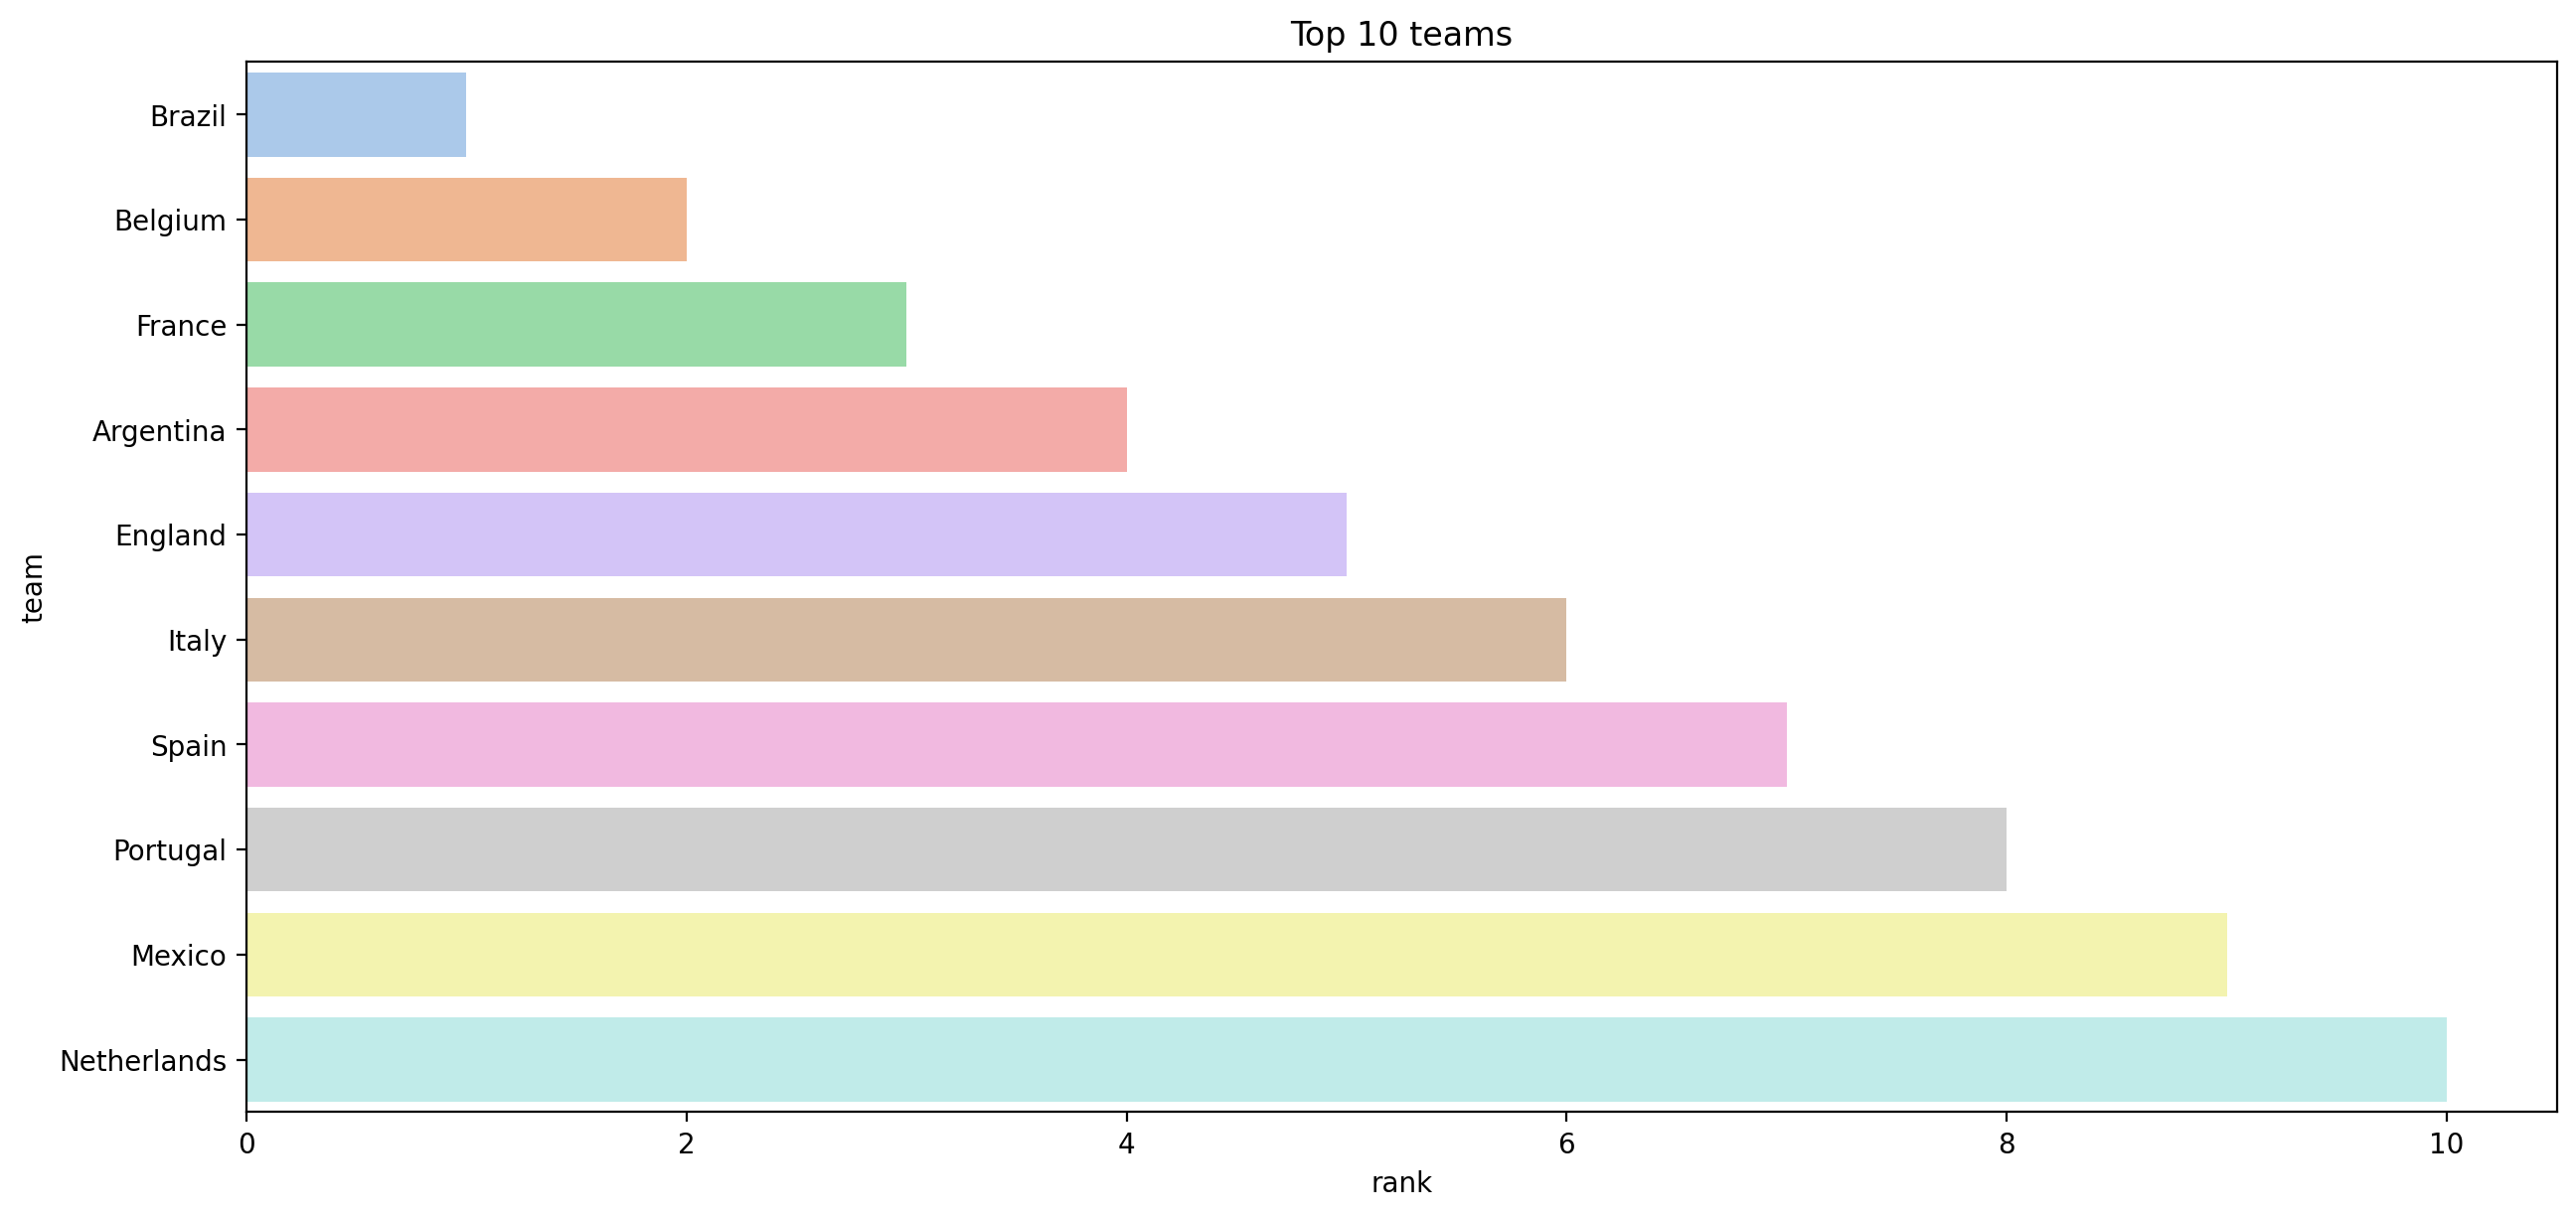

In [ ]:
plt.figure(figsize=(15,7),dpi=200)
sns.barplot(data=fifa_rank_top10,y='team',x='rank',palette='pastel',dodge=False)
plt.title("Top 10 teams");

In [ ]:
fifa_offense = df[['date', 'home_team', 'away_team','home_team_mean_offense_score','away_team_mean_offense_score']]
home = fifa_offense[['date','home_team','home_team_mean_offense_score']].rename(columns={"home_team":"team","home_team_mean_offense_score":"offense_score"})
away = fifa_offense[['date','away_team','away_team_mean_offense_score']].rename(columns={"away_team":"team","away_team_mean_offense_score":"offense_score"})
fifa_offense = pd.concat([home,away])
fifa_offense = fifa_offense.sort_values(['date','team'],ascending=[False,True])
fifa_offense.head(10)

,date,team,offense_score
19784,2022-06-14,Afghanistan,NaN
19803,2022-06-14,Andorra,NaN
19797,2022-06-14,Armenia,69.7
19786,2022-06-14,Bahrain,NaN
19787,2022-06-14,Bangladesh,NaN
19796,2022-06-14,Belgium,85.7
19799,2022-06-14,Bosnia and Herzegovina,77.0
19784,2022-06-14,Cambodia,NaN
19805,2022-06-14,Chile,76.7
19777,2022-06-14,Costa Rica,70.3


In [ ]:
#Groupby and reset_index for top 10 team with highest offense_score
fifa_offense_top10 = fifa_offense.groupby('team').first().sort_values('offense_score',ascending=False)[0:10].reset_index()
fifa_offense_top10

,team,date,offense_score
0,Argentina,2022-06-05,89.0
1,France,2022-06-13,88.3
2,England,2022-06-14,88.0
3,Brazil,2022-06-06,86.3
4,Portugal,2022-06-12,86.0
5,Belgium,2022-06-14,85.7
6,Italy,2022-06-14,85.3
7,Spain,2022-06-12,85.0
8,Poland,2022-06-14,84.7
9,Uruguay,2022-06-11,84.3


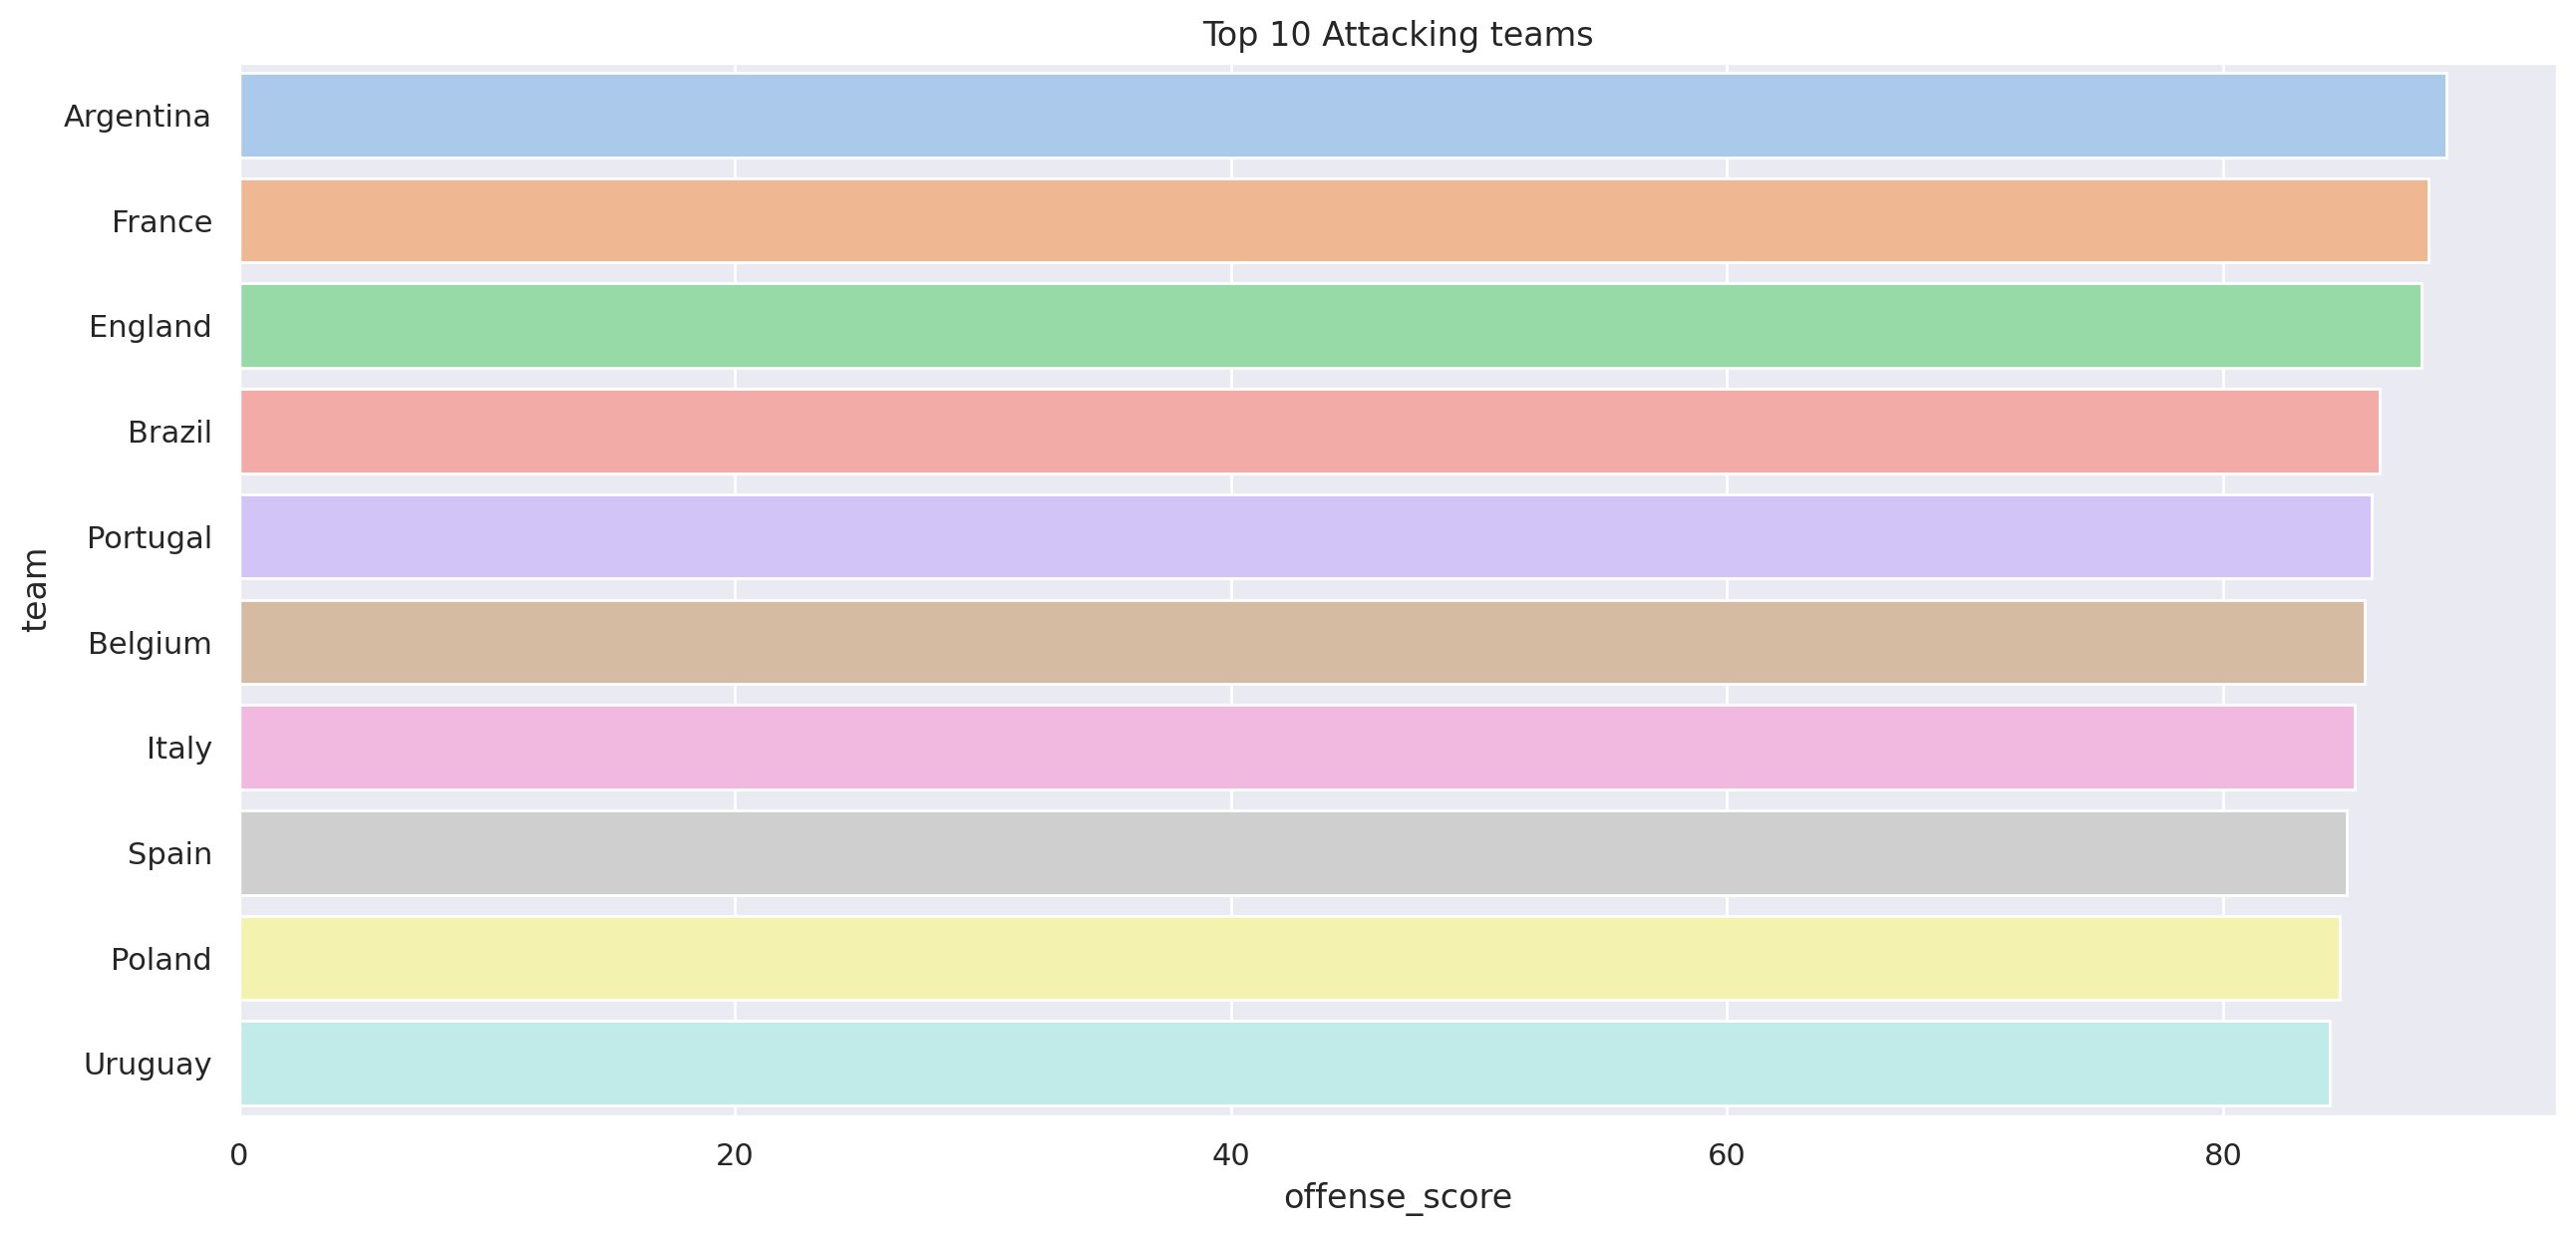

In [ ]:
plt.figure(figsize=(15,7),dpi=200)

sns.barplot(data=fifa_offense_top10,x='offense_score',y='team',palette='pastel')
plt.title("Top 10 Attacking teams");

In [ ]:
fifa_midfield = df[['date', 'home_team', 'away_team','home_team_mean_midfield_score','away_team_mean_midfield_score']]
home = fifa_midfield[['date','home_team','home_team_mean_midfield_score']].rename(columns={"home_team":"team","home_team_mean_midfield_score":"midfield_score"})
away = fifa_midfield[['date','away_team','away_team_mean_midfield_score']].rename(columns={"away_team":"team","away_team_mean_midfield_score":"midfield_score"})
fifa_midfield = pd.concat([home,away])
fifa_midfield = fifa_midfield.sort_values(['date','team'],ascending=[False,True])
fifa_midfield.head(10)

,date,team,midfield_score
19784,2022-06-14,Afghanistan,NaN
19803,2022-06-14,Andorra,NaN
19797,2022-06-14,Armenia,NaN
19786,2022-06-14,Bahrain,NaN
19787,2022-06-14,Bangladesh,NaN
19796,2022-06-14,Belgium,85.5
19799,2022-06-14,Bosnia and Herzegovina,78.0
19784,2022-06-14,Cambodia,NaN
19805,2022-06-14,Chile,78.2
19777,2022-06-14,Costa Rica,69.2


In [ ]:
#Groupby and reset_index for top 10 team with highest midfield_score
fifa_midfield_top10 = fifa_midfield.groupby('team').first().sort_values('midfield_score',ascending=False)[0:10].reset_index()
fifa_midfield_top10

,team,date,midfield_score
0,Germany,2022-06-14,87.8
1,France,2022-06-13,86.8
2,Spain,2022-06-12,86.0
3,Belgium,2022-06-14,85.5
4,Brazil,2022-06-06,85.5
5,Portugal,2022-06-12,84.5
6,Italy,2022-06-14,84.5
7,Croatia,2022-06-13,84.2
8,England,2022-06-14,84.0
9,Argentina,2022-06-05,84.0


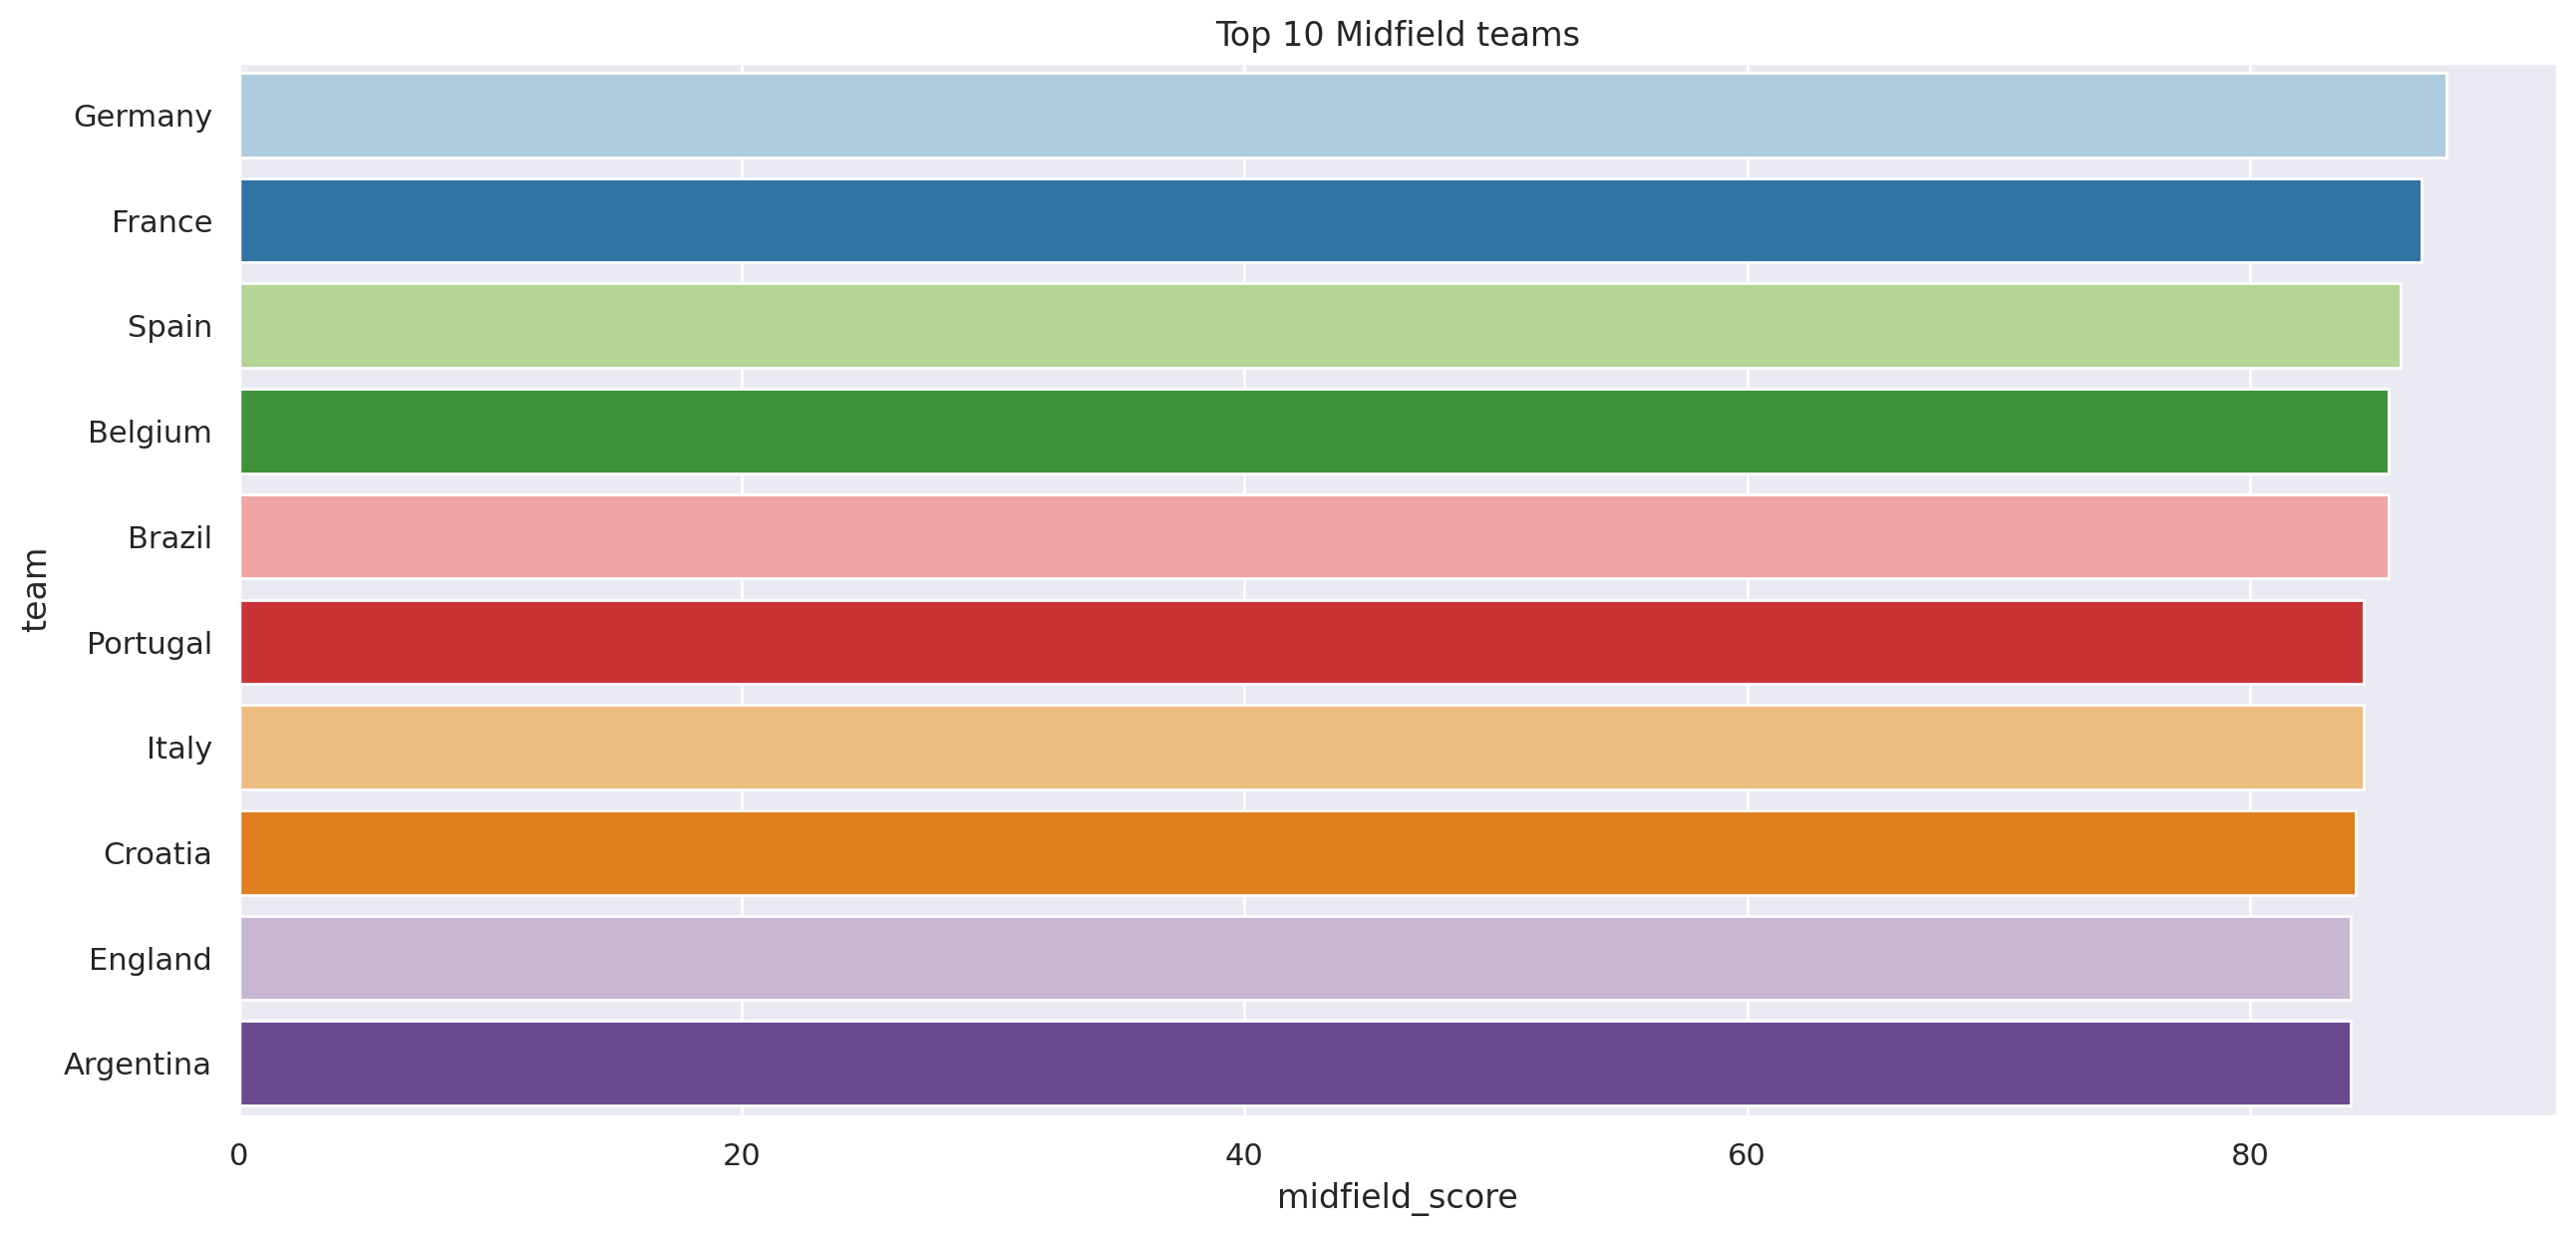

In [ ]:
plt.figure(figsize=(15,7),dpi=200)

sns.barplot(data=fifa_midfield_top10,x='midfield_score',y='team',palette='Paired')
plt.title("Top 10 Midfield teams");

In [ ]:
fifa_defense = df[['date', 'home_team', 'away_team','home_team_mean_defense_score','away_team_mean_defense_score']]
home = fifa_defense[['date','home_team','home_team_mean_defense_score']].rename(columns={"home_team":"team","home_team_mean_defense_score":"defense_score"})
away = fifa_defense[['date','away_team','away_team_mean_defense_score']].rename(columns={"away_team":"team","away_team_mean_defense_score":"defense_score"})
fifa_defense = pd.concat([home,away])
fifa_defense = fifa_defense.sort_values(['date','team'],ascending=[False,True])
fifa_defense.head(10)

,date,team,defense_score
19784,2022-06-14,Afghanistan,NaN
19803,2022-06-14,Andorra,NaN
19797,2022-06-14,Armenia,NaN
19786,2022-06-14,Bahrain,NaN
19787,2022-06-14,Bangladesh,NaN
19796,2022-06-14,Belgium,80.8
19799,2022-06-14,Bosnia and Herzegovina,74.2
19784,2022-06-14,Cambodia,NaN
19805,2022-06-14,Chile,75.5
19777,2022-06-14,Costa Rica,71.5


In [ ]:
#Groupby and reset_index for top 10 team with highest defense_score
fifa_defense_top10 = fifa_defense.groupby('team').first().sort_values('defense_score',ascending=False)[0:10].reset_index()
fifa_defense_top10

,team,date,defense_score
0,Spain,2022-06-12,86.5
1,Portugal,2022-06-12,85.2
2,Netherlands,2022-06-14,85.2
3,England,2022-06-14,85.0
4,Brazil,2022-06-06,84.8
5,Italy,2022-06-14,84.2
6,France,2022-06-13,84.2
7,Germany,2022-06-14,84.0
8,Argentina,2022-06-05,82.2
9,Uruguay,2022-06-11,81.2


Text(0.5, 1.0, 'Top 10 Defense Teams')

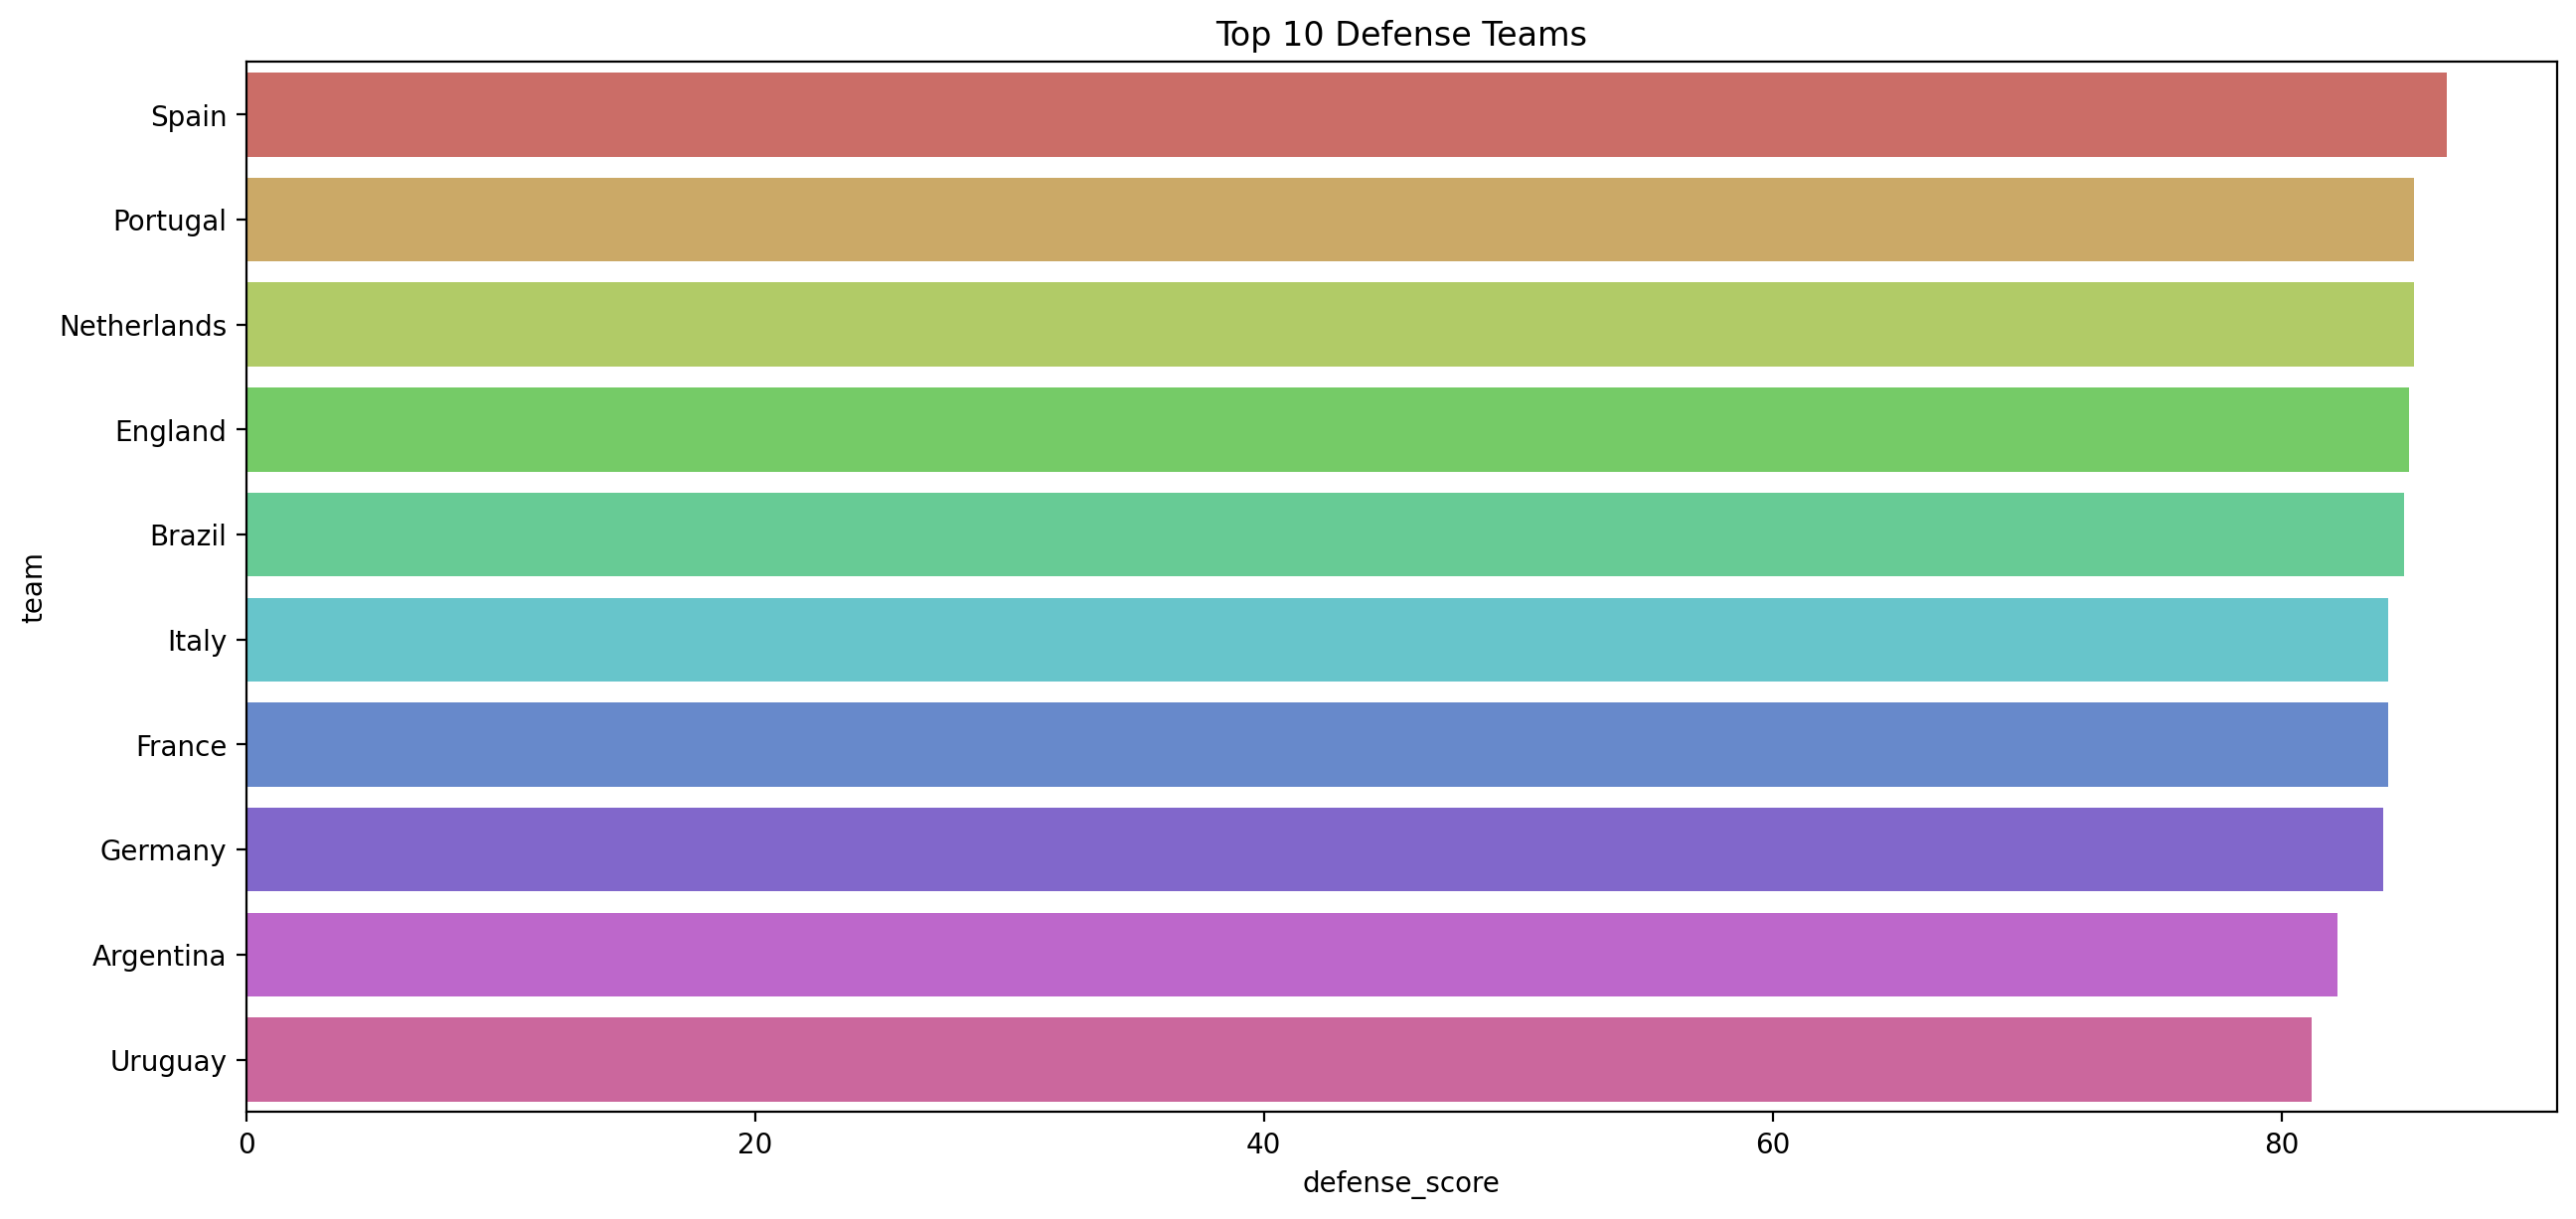

In [ ]:
plt.figure(figsize=(15,7),dpi=200)

sns.barplot(data=fifa_defense_top10,x='defense_score',y='team',palette='hls')
plt.title("Top 10 Defense Teams")

##Analyze and fill nas

In [ ]:
df.isnull().sum()

date                                 0
home_team                            0
away_team                            0
home_team_continent                  0
away_team_continent                  0
home_team_fifa_rank                  0
away_team_fifa_rank                  0
home_team_total_fifa_points          0
away_team_total_fifa_points          0
home_team_score                      0
away_team_score                      0
tournament                           0
city                                 0
country                              0
neutral_location                     0
shoot_out                            0
home_team_result                     0
home_team_goalkeeper_score       11429
away_team_goalkeeper_score       11713
home_team_mean_defense_score     12021
home_team_mean_offense_score     11298
home_team_mean_midfield_score    11646
away_team_mean_defense_score     12244
away_team_mean_offense_score     11496
away_team_mean_midfield_score    11829
dtype: int64

In [ ]:
#Fill mean for na's in goal_keeper_score(both away and home teams)
df[df['home_team'] == "Brazil"]['home_team_goalkeeper_score'].describe()

count    135.000000
mean      86.074074
std        3.327026
min       82.000000
25%       83.000000
50%       86.000000
75%       89.000000
max       93.000000
Name: home_team_goalkeeper_score, dtype: float64

In [ ]:
df['home_team_goalkeeper_score'] = round(df.groupby("home_team")["home_team_goalkeeper_score"].transform(lambda x: x.fillna(x.mean())))
df['away_team_goalkeeper_score'] = round(df.groupby("away_team")["away_team_goalkeeper_score"].transform(lambda x: x.fillna(x.mean())))

In [ ]:
#Fill mean for na's in defense score(both away and home teams)
df[df['away_team'] == "Brazil"]['home_team_mean_defense_score'].describe()

count    99.000000
mean     76.523232
std       5.807469
min      58.500000
25%      73.250000
50%      76.200000
75%      81.000000
max      87.500000
Name: home_team_mean_defense_score, dtype: float64

In [ ]:
df['home_team_mean_defense_score'] = round(df.groupby('home_team')['home_team_mean_defense_score'].transform(lambda x : x.fillna(x.mean())))
df['away_team_mean_defense_score'] = round(df.groupby('away_team')['away_team_mean_defense_score'].transform(lambda x : x.fillna(x.mean())))

In [ ]:
#Fill mean for na's in na's in offense score(both away and home teams)
df[df['away_team'] == "Brazil"]['home_team_mean_offense_score'].describe()

count    99.000000
mean     78.695960
std       5.462543
min      66.300000
25%      74.850000
50%      78.300000
75%      82.500000
max      90.300000
Name: home_team_mean_offense_score, dtype: float64

In [ ]:
df['home_team_mean_offense_score'] = round(df.groupby('home_team')['home_team_mean_offense_score'].transform(lambda x : x.fillna(x.mean())))
df['away_team_mean_offense_score'] = round(df.groupby('away_team')['away_team_mean_offense_score'].transform(lambda x : x.fillna(x.mean())))

In [ ]:
#Fill mean for na's in na's in midfield score(both away and home teams)
df[df['away_team'] == "Brazil"]['home_team_mean_midfield_score'].describe()


count    100.000000
mean      78.168000
std        5.414158
min       60.000000
25%       75.725000
50%       78.200000
75%       82.350000
max       88.500000
Name: home_team_mean_midfield_score, dtype: float64

In [ ]:
df['home_team_mean_midfield_score'] = round(df.groupby('home_team')['home_team_mean_midfield_score'].transform(lambda x : x.fillna(x.mean())))
df['away_team_mean_midfield_score'] = round(df.groupby('away_team')['away_team_mean_midfield_score'].transform(lambda x : x.fillna(x.mean())))

In [ ]:
df.isnull().sum()

date                                0
home_team                           0
away_team                           0
home_team_continent                 0
away_team_continent                 0
home_team_fifa_rank                 0
away_team_fifa_rank                 0
home_team_total_fifa_points         0
away_team_total_fifa_points         0
home_team_score                     0
away_team_score                     0
tournament                          0
city                                0
country                             0
neutral_location                    0
shoot_out                           0
home_team_result                    0
home_team_goalkeeper_score       4991
away_team_goalkeeper_score       5511
home_team_mean_defense_score     6940
home_team_mean_offense_score     6116
home_team_mean_midfield_score    6036
away_team_mean_defense_score     7217
away_team_mean_offense_score     6260
away_team_mean_midfield_score    6159
dtype: int64

In [ ]:
df[['home_team_goalkeeper_score','away_team_goalkeeper_score','home_team_mean_defense_score','home_team_mean_offense_score','away_team_mean_defense_score','away_team_mean_offense_score','away_team_mean_midfield_score']].head(10)

,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,70.0,69.0,70.0,74.0,62.0,72.0,68.0
1,65.0,69.0,72.0,71.0,62.0,72.0,68.0
2,66.0,72.0,65.0,71.0,69.0,71.0,73.0
3,71.0,67.0,67.0,70.0,68.0,72.0,73.0
4,67.0,63.0,NaN,67.0,NaN,70.0,73.0
5,70.0,70.0,77.0,81.0,70.0,74.0,72.0
6,79.0,69.0,77.0,79.0,69.0,71.0,70.0
7,57.0,72.0,NaN,62.0,69.0,71.0,73.0
8,71.0,78.0,67.0,70.0,78.0,79.0,77.0
9,73.0,78.0,78.0,80.0,78.0,79.0,77.0


In [ ]:
#Teams are not available in FIFA game itself, so they are not less than average performing teams, so giving a average score of 50 for all.
df.fillna(50,inplace=True)
df.isnull().sum()

date                             0
home_team                        0
away_team                        0
home_team_continent              0
away_team_continent              0
home_team_fifa_rank              0
away_team_fifa_rank              0
home_team_total_fifa_points      0
away_team_total_fifa_points      0
home_team_score                  0
away_team_score                  0
tournament                       0
city                             0
country                          0
neutral_location                 0
shoot_out                        0
home_team_result                 0
home_team_goalkeeper_score       0
away_team_goalkeeper_score       0
home_team_mean_defense_score     0
home_team_mean_offense_score     0
home_team_mean_midfield_score    0
away_team_mean_defense_score     0
away_team_mean_offense_score     0
away_team_mean_midfield_score    0
dtype: int64

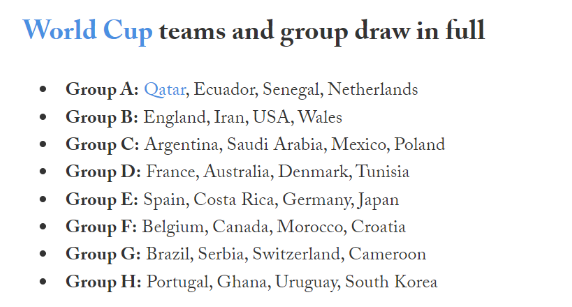

In [ ]:
#Filter 32  teams participating in World cup 20 November 2022
list_2022 = ["Qatar", "Ecuador", "Senegal", "Netherlands", 
              "England", "IR Iran", "USA", "Wales",
              "Argentina", "Saudi Arabia", "Mexico", "Poland",
              "France", "Australia", "Denmark", "Tunisia",
              "Spain", "Costa Rica", "Germany", "Japan",
              "Belgium", "Canada", "Morocco", "Croatia",
              "Brazil", "Serbia", "Switzerland", "Cameroon",
              "Portugal", "Ghana", "Uruguay", "Korea Republic"]

final_df = df[(df["home_team"].apply(lambda x: x in list_2022)) | (df["away_team"].apply(lambda x: x in list_2022))]
len(list_2022)

32

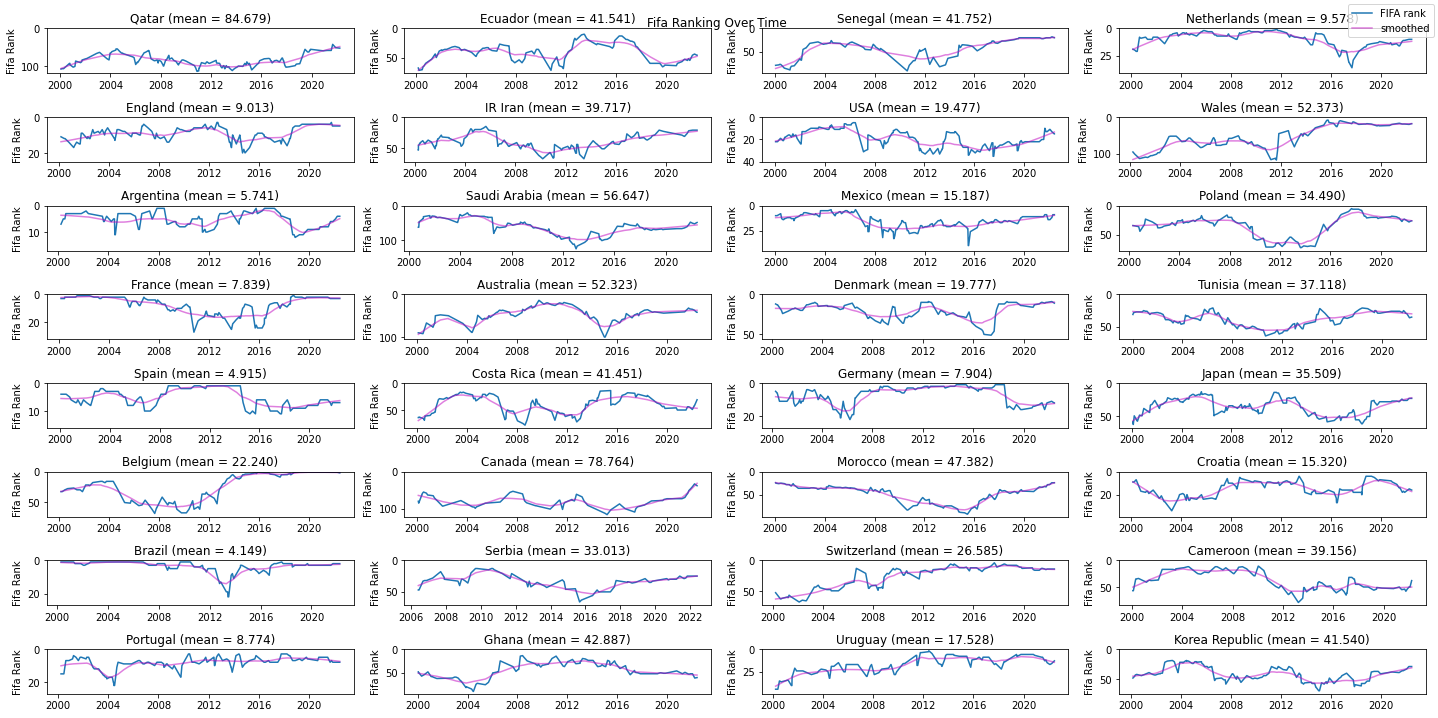

In [ ]:
def plotFifaRank(team : str):
    if ("south korea" in team.lower()):
        team = "Korea Republic"
    if ("north korea" in team.lower()):
        team = "Korea DPR"
    if ("iran" in team.lower()):
        team = "IR Iran"
    
    x = df[(df.home_team.str.contains(team))].date
    y = df[(df.home_team == team)].home_team_fifa_rank
    
    lowess = sm.nonparametric.lowess
    smoothed = lowess(y, x, is_sorted=True, frac=0.2, it=0)
    smoothedy = smoothed[:,1]
    plt.plot(x, y, label="FIFA rank")
    plt.plot(x, smoothedy, 'm', alpha = 0.5, label="smoothed")
    plt.ylim((0, np.max(y) + 5))
    plt.ylabel("Fifa Rank")
    plt.gca().invert_yaxis()
    plt.title(f"{team} (mean = {y.mean() :.3f})")

    
fig, ax = plt.subplots(nrows=8,ncols=4, figsize = (20, 10))
for i, team in enumerate(list_2022):
    plt.sca(ax.flatten()[i])
    plotFifaRank(team)
fig.suptitle("Fifa Ranking Over Time")
handles, labels = ax.flatten()[i].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
fig.tight_layout()
fig.show()

##Top 10 teams with winning percentage

In [ ]:
rank = final_df[['date','home_team','away_team','home_team_fifa_rank', 'away_team_fifa_rank']]
home = rank[['date','home_team','home_team_fifa_rank']].rename(columns={"home_team":"team","home_team_fifa_rank":"rank"})
away = rank[['date','away_team','away_team_fifa_rank']].rename(columns={"away_team":"team","away_team_fifa_rank":"rank"})
rank = pd.concat([home,away])
#Select each country latest match
rank = rank.sort_values(['team','date'],ascending=[True,False])
rank_top10 = rank.groupby('team').first().sort_values('rank',ascending=True).reset_index()
rank_top10 = rank_top10[(rank_top10["team"].apply(lambda x: x in list_2022))][0:10]
rank_top10

,team,date,rank
0,Brazil,2022-06-06,1
1,Belgium,2022-06-14,2
2,France,2022-06-13,3
3,Argentina,2022-06-05,4
4,England,2022-06-14,5
6,Spain,2022-06-12,7
7,Portugal,2022-06-12,8
8,Mexico,2022-06-14,9
9,Netherlands,2022-06-14,10
10,Denmark,2022-06-13,11


In [ ]:
def home_percentage(team):
    score = len(df[(df['home_team'] == team) & (df['home_team_result'] == "Win")]) / len(df[df['home_team'] == team]) * 100
    return round(score)
def away_percentage(team):
    score = len(df[(df['away_team'] == team) & (df['home_team_result'] == "Lose")]) / len(df[df['away_team'] == team]) * 100
    return round(score)

In [ ]:
rank_top10['Home_win_Per'] = np.vectorize(home_percentage)(rank_top10['team'])
rank_top10['Away_win_Per'] = np.vectorize(away_percentage)(rank_top10['team'])
rank_top10['Average_win_Per'] = round((rank_top10['Home_win_Per'] + rank_top10['Away_win_Per'])/2)
rank_top10_Win = rank_top10.sort_values('Average_win_Per',ascending=False)
rank_top10_Win

,team,date,rank,Home_win_Per,Away_win_Per,Average_win_Per
6,Spain,2022-06-12,7,80,61,70.0
0,Brazil,2022-06-06,1,74,60,67.0
2,France,2022-06-13,3,65,57,61.0
9,Netherlands,2022-06-14,10,65,57,61.0
3,Argentina,2022-06-05,4,69,52,60.0
4,England,2022-06-14,5,66,53,60.0
7,Portugal,2022-06-12,8,65,51,58.0
1,Belgium,2022-06-14,2,63,49,56.0
8,Mexico,2022-06-14,9,62,43,52.0
10,Denmark,2022-06-13,11,53,45,49.0


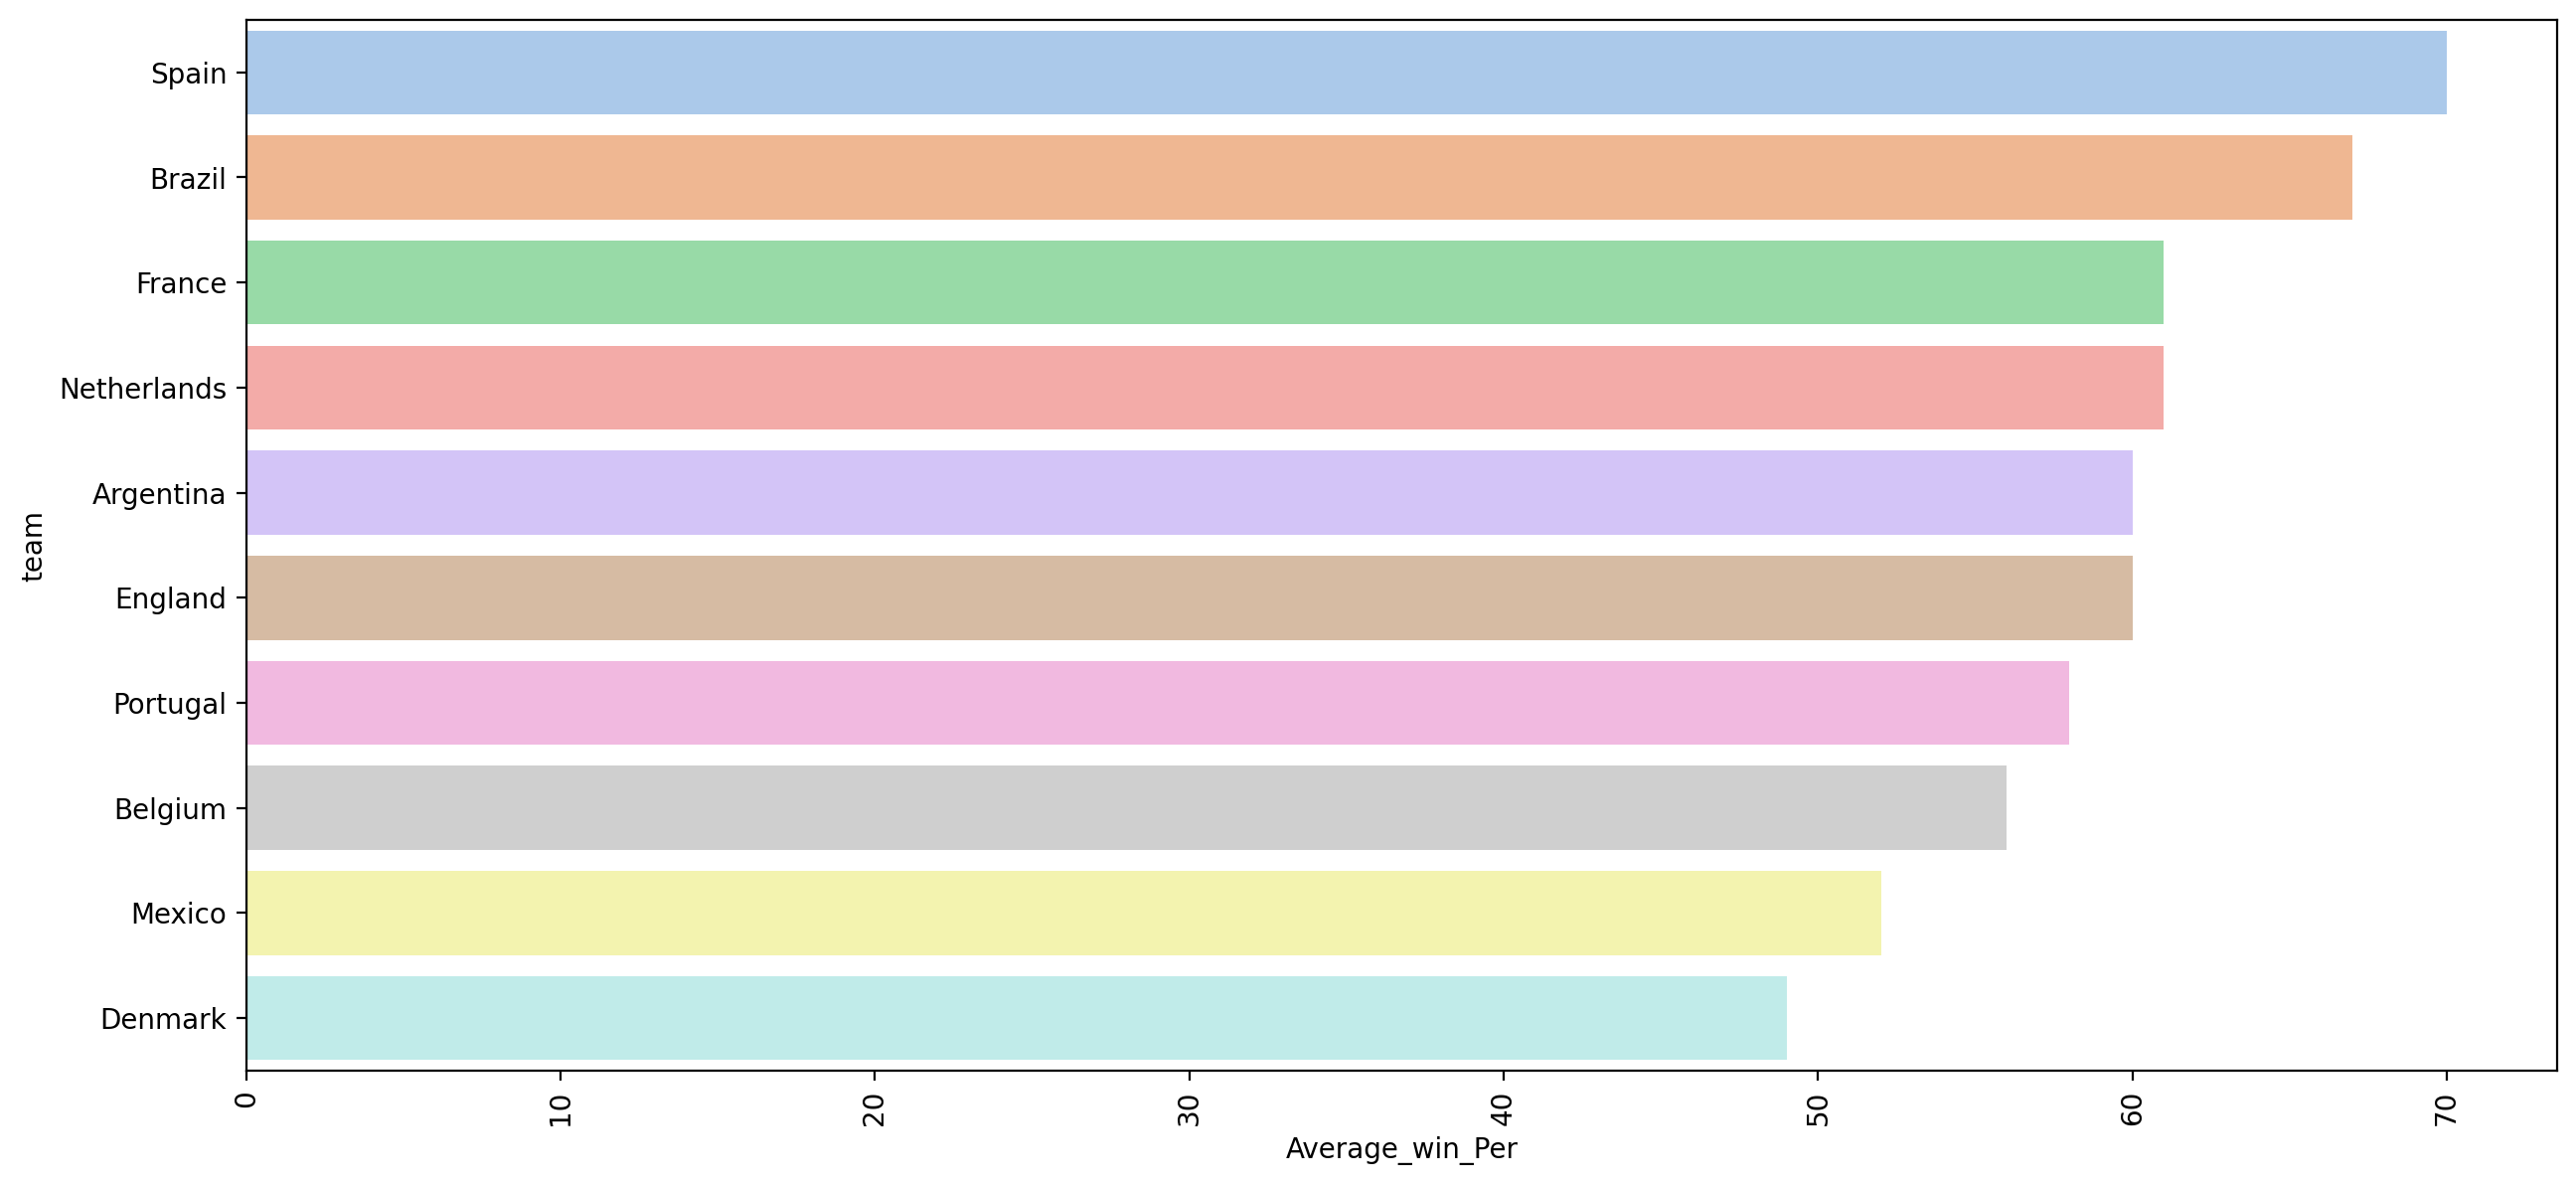

In [ ]:
plt.figure(figsize=(15,7),dpi=200)

sns.barplot(data=rank_top10_Win,x='Average_win_Per',y='team',palette='pastel')
plt.xticks(rotation=90);

In [ ]:
print(final_df['home_team_result'])

1         Win
2        Draw
6         Win
7        Lose
8        Draw
         ... 
19795     Win
19796    Lose
19805    Lose
19806    Lose
19807     Win
Name: home_team_result, Length: 7503, dtype: object


In [ ]:
#Mapping numeric values for home_team_result to find the correleations
final_df['home_team_result'] = final_df['home_team_result'].map({'Win':1, 'Draw':2, 'Lose':0})

<ipython-input-114-6ac705db1758>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['home_team_result'] = final_df['home_team_result'].map({'Win':1, 'Draw':2, 'Lose':0})


##Find corr to compare the fit of data

In [ ]:
final_df.corr()['home_team_result'].sort_values(ascending=False)

home_team_result                 1.000000
home_team_mean_offense_score     0.166237
home_team_mean_defense_score     0.157862
home_team_mean_midfield_score    0.157549
home_team_score                  0.134211
home_team_goalkeeper_score       0.123016
away_team_fifa_rank              0.122823
home_team_total_fifa_points      0.023503
away_team_total_fifa_points     -0.051035
neutral_location                -0.063776
away_team_mean_offense_score    -0.121054
away_team_mean_defense_score    -0.127226
away_team_goalkeeper_score      -0.130074
away_team_mean_midfield_score   -0.132665
home_team_fifa_rank             -0.192660
away_team_score                 -0.466080
Name: home_team_result, dtype: float64

In [ ]:
#Dropping unnecessary colums
final_df = final_df.drop(['date', 'home_team_continent','away_team_continent','home_team_total_fifa_points', 'away_team_total_fifa_points','home_team_score', 'away_team_score', 'tournament', 'city', 'country','neutral_location', 'shoot_out'],axis=1)

In [ ]:
final_df.columns


Index(['home_team', 'away_team', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_result', 'home_team_goalkeeper_score',
       'away_team_goalkeeper_score', 'home_team_mean_defense_score',
       'home_team_mean_offense_score', 'home_team_mean_midfield_score',
       'away_team_mean_defense_score', 'away_team_mean_offense_score',
       'away_team_mean_midfield_score'],
      dtype='object')

In [ ]:
#change column names
final_df.rename(columns={"home_team":"Team1", "away_team": "Team2", "home_team_fifa_rank": "Team1_FIFA_RANK", 
                         "away_team_fifa_rank":"Team2_FIFA_RANK", "home_team_result":"Team1_Result", "home_team_goalkeeper_score":"Team1_Goalkeeper_Score",
                        "away_team_goalkeeper_score":"Team2_Goalkeeper_Score", "home_team_mean_defense_score":"Team1_Defense",
                        "home_team_mean_offense_score":"Team1_Offense", "home_team_mean_midfield_score":"Team1_Midfield",
                        "away_team_mean_defense_score":"Team2_Defense", "away_team_mean_offense_score":"Team2_Offense",
                        "away_team_mean_midfield_score":"Team2_Midfield"},inplace=True)

In [ ]:
print(final_df.corr())

                        Team1_FIFA_RANK  Team2_FIFA_RANK  Team1_Result  \
Team1_FIFA_RANK                1.000000         0.045458     -0.192660   
Team2_FIFA_RANK                0.045458         1.000000      0.122823   
Team1_Result                  -0.192660         0.122823      1.000000   
Team1_Goalkeeper_Score        -0.735506        -0.123008      0.123016   
Team2_Goalkeeper_Score        -0.082718        -0.736754     -0.130074   
Team1_Defense                 -0.793681        -0.081750      0.157862   
Team1_Offense                 -0.793355        -0.094779      0.166237   
Team1_Midfield                -0.793984        -0.085577      0.157549   
Team2_Defense                 -0.055427        -0.794802     -0.127226   
Team2_Offense                 -0.067151        -0.800565     -0.121054   
Team2_Midfield                -0.057569        -0.802470     -0.132665   

                        Team1_Goalkeeper_Score  Team2_Goalkeeper_Score  \
Team1_FIFA_RANK                      

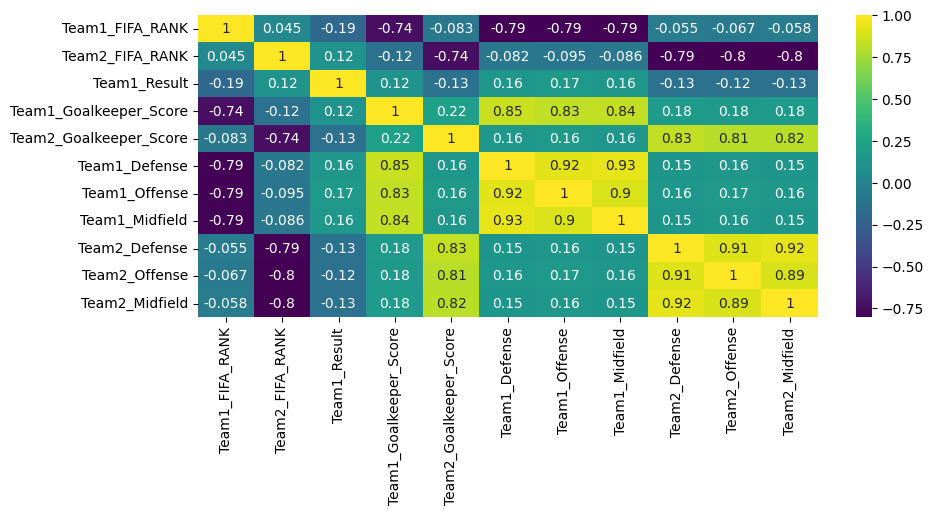

In [ ]:
plt.figure(figsize=(10,4),dpi=100)
sns.heatmap(final_df.corr(),annot=True,cmap='viridis')

Draw conclusions based on yin and yang correlation




In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7503 entries, 1 to 19807
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Team1                   7503 non-null   object 
 1   Team2                   7503 non-null   object 
 2   Team1_FIFA_RANK         7503 non-null   int64  
 3   Team2_FIFA_RANK         7503 non-null   int64  
 4   Team1_Result            7503 non-null   int64  
 5   Team1_Goalkeeper_Score  7503 non-null   float64
 6   Team2_Goalkeeper_Score  7503 non-null   float64
 7   Team1_Defense           7503 non-null   float64
 8   Team1_Offense           7503 non-null   float64
 9   Team1_Midfield          7503 non-null   float64
 10  Team2_Defense           7503 non-null   float64
 11  Team2_Offense           7503 non-null   float64
 12  Team2_Midfield          7503 non-null   float64
dtypes: float64(8), int64(3), object(2)
memory usage: 820.6+ KB


In [ ]:
#Holdout another DF for pipeline
pipe_DF = final_df
#Create dummies for categorical columns
final_df = pd.get_dummies(final_df)

In [ ]:
pd.get_dummies(final_df)

,Team1_FIFA_RANK,Team2_FIFA_RANK,Team1_Result,Team1_Goalkeeper_Score,Team2_Goalkeeper_Score,Team1_Defense,Team1_Offense,Team1_Midfield,Team2_Defense,Team2_Offense,...,Team2_United Arab Emirates,Team2_Uruguay,Team2_Uzbekistan,Team2_Vanuatu,Team2_Venezuela,Team2_Vietnam,Team2_Wales,Team2_Yemen,Team2_Zambia,Team2_Zimbabwe
1,31,87,1,65.0,69.0,72.0,71.0,73.0,62.0,72.0,...,0,0,0,0,0,0,0,0,0,0
2,44,81,2,66.0,72.0,65.0,71.0,67.0,69.0,71.0,...,0,0,0,0,0,0,0,0,0,0
6,10,49,1,79.0,69.0,77.0,79.0,78.0,69.0,71.0,...,0,0,0,0,0,0,0,0,0,0
7,163,81,0,57.0,72.0,50.0,62.0,50.0,69.0,71.0,...,0,0,0,0,0,0,0,0,0,0
8,71,58,2,71.0,78.0,67.0,70.0,71.0,78.0,79.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19795,10,18,1,81.0,74.0,85.0,83.0,84.0,75.0,73.0,...,0,0,0,0,0,0,1,0,0,0
19796,26,2,0,87.0,89.0,75.0,85.0,76.0,81.0,86.0,...,0,0,0,0,0,0,0,0,0,0
19805,28,60,0,79.0,74.0,76.0,77.0,78.0,76.0,76.0,...,0,0,0,0,0,0,0,0,0,0
19806,23,35,0,73.0,64.0,75.0,75.0,78.0,71.0,72.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#split X and y and train test split (For League Matches)
X = final_df.drop('Team1_Result',axis=1)
y = final_df['Team1_Result']
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
#Validtion and test set
X_hold_test, X_test, y_hold_test, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

In [ ]:
#Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_hold_test = scaler.transform(X_hold_test)

 Matrix




In [ ]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
def metrics_display(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred,cmap=plt.cm.PuBu)
    


              precision    recall  f1-score   support

           0       0.45      0.44      0.45       338
           1       0.61      0.61      0.61       540
           2       0.22      0.23      0.22       248

    accuracy                           0.48      1126
   macro avg       0.43      0.43      0.43      1126
weighted avg       0.48      0.48      0.48      1126



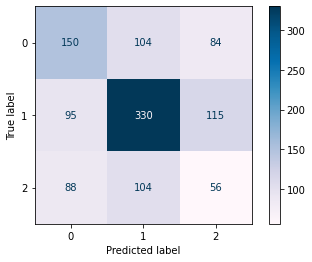

In [ ]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
metrics_display(DecisionTreeClassifier())

              precision    recall  f1-score   support

           0       0.55      0.57      0.56       338
           1       0.63      0.79      0.70       540
           2       0.17      0.07      0.10       248

    accuracy                           0.56      1126
   macro avg       0.45      0.48      0.45      1126
weighted avg       0.51      0.56      0.53      1126



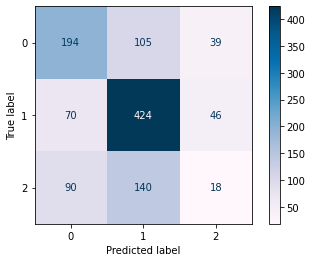

In [ ]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
metrics_display(RandomForestClassifier())

              precision    recall  f1-score   support

           0       0.58      0.60      0.59       338
           1       0.63      0.88      0.73       540
           2       0.24      0.02      0.03       248

    accuracy                           0.61      1126
   macro avg       0.48      0.50      0.45      1126
weighted avg       0.53      0.61      0.54      1126



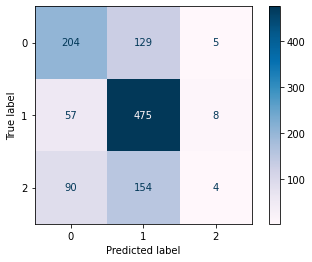

In [ ]:
#Ada Boost Classifier
from sklearn.ensemble import AdaBoostClassifier
metrics_display(AdaBoostClassifier())

              precision    recall  f1-score   support

           0       0.58      0.64      0.61       338
           1       0.63      0.86      0.73       540
           2       0.21      0.02      0.04       248

    accuracy                           0.61      1126
   macro avg       0.47      0.50      0.46      1126
weighted avg       0.52      0.61      0.54      1126



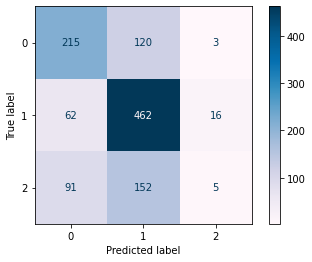

In [ ]:
#XGB Boost
from xgboost import XGBClassifier
metrics_display(XGBClassifier(use_label_encoder=False))

In [ ]:
X_train.shape


(5252, 399)

##Predictions for Knockout Stage - Removing Draw status

In [ ]:
knock_df = pipe_DF[pipe_DF['Team1_Result'] != 2]

In [ ]:
pipe_knock_df = knock_df
knock_df = pd.get_dummies(knock_df)
X = knock_df.drop('Team1_Result',axis=1)
y = knock_df['Team1_Result']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
X_hold_test, X_test, y_hold_test, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

              precision    recall  f1-score   support

           0       0.70      0.70      0.70       349
           1       0.80      0.80      0.80       523

    accuracy                           0.76       872
   macro avg       0.75      0.75      0.75       872
weighted avg       0.76      0.76      0.76       872



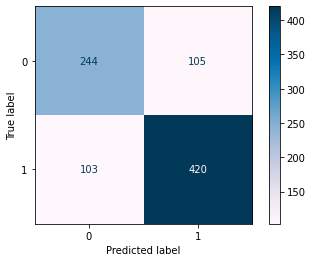

In [ ]:
metrics_display(RandomForestClassifier())


              precision    recall  f1-score   support

           0       0.66      0.66      0.66       290
           1       0.83      0.83      0.83       582

    accuracy                           0.77       872
   macro avg       0.74      0.74      0.74       872
weighted avg       0.77      0.77      0.77       872



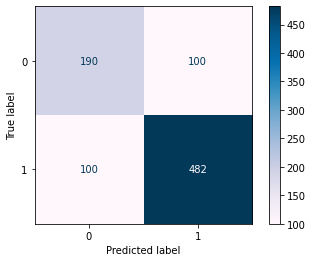

In [ ]:
#Random Forest is giving good accuracy, so testing with a holdout test and finalizing the model
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_hold_test)
print(classification_report(y_hold_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_hold_test,y_pred,cmap=plt.cm.PuBu);

In [ ]:
#XGB Model is finalized, so creating a pipeline for it
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
column_trans = make_column_transformer(
    (OneHotEncoder(),['Team1', 'Team2']),remainder='passthrough')

pipe_X = pipe_DF.drop('Team1_Result',axis=1)
pipe_y = pipe_DF['Team1_Result']

from sklearn.pipeline import make_pipeline
pipe_League = make_pipeline(column_trans,StandardScaler(with_mean=False),XGBClassifier(use_label_encoder=False))
pipe_League.fit(pipe_X,pipe_y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Team1', 'Team2'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('xgbclassifier',
                 XGBClassifier(objective='multi:softprob',
                               use_label_encoder=False))])

In [ ]:
pipe_X = pipe_knock_df.drop('Team1_Result',axis=1)
pipe_y = pipe_knock_df['Team1_Result']
pipe_knock = make_pipeline(column_trans,StandardScaler(with_mean=False),RandomForestClassifier())
pipe_knock.fit(pipe_X,pipe_y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Team1', 'Team2'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('randomforestclassifier', RandomForestClassifier())])

**Simulation**

Feature engineering

In [ ]:
# feature generation
df['rank_difference'] = df['home_team_fifa_rank'] - df['away_team_fifa_rank']
df['average_rank'] = (df['home_team_fifa_rank'] + df['away_team_fifa_rank'])/2
df['point_difference'] = df['home_team_total_fifa_points'] - df['away_team_total_fifa_points']
df['score_difference'] = df['home_team_score'] - df['away_team_score']
df['is_won'] = df['score_difference'] > 0 # take draw as lost
df['is_stake'] = df['tournament'] != 'Friendly'

Model

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


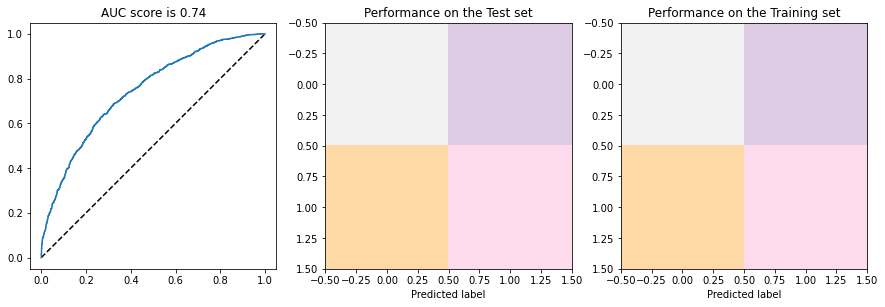

In [ ]:
from sklearn import linear_model
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

#X, y = df.loc[:,['average_rank', 'rank_difference', 'point_difference','is_stake']], df['is_won']
X, y = df.loc[:,['average_rank', 'rank_difference', 'point_difference']], df['is_won']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

logreg = linear_model.LogisticRegression(C=1e-5)
features = PolynomialFeatures(degree=2)
model = Pipeline([
    ('polynomial_features', features),
    ('logistic_regression', logreg)
])
model = model.fit(X_train, y_train)

# figures 
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure(figsize=(15,5))
ax = plt.subplot(1,3,1)
ax.plot([0, 1], [0, 1], 'k--')
ax.plot(fpr, tpr)
ax.set_title('AUC score is {0:0.2}'.format(roc_auc_score(y_test, model.predict_proba(X_test)[:,1])))
ax.set_aspect(1)

ax = plt.subplot(1,3,2)
cm = confusion_matrix(y_test, model.predict(X_test))
ax.imshow(cm, cmap='Pastel1', clim = (0, cm.max())) 

ax.set_xlabel('Predicted label')
ax.set_title('Performance on the Test set')

ax = plt.subplot(1,3,3)
cm = confusion_matrix(y_train, model.predict(X_train))
ax.imshow(cm, cmap='Pastel1', clim = (0, cm.max())) 
ax.set_xlabel('Predicted label')
ax.set_title('Performance on the Training set')
pass

Test

In [ ]:
world_cup_rankings_home = df[['home_team','home_team_fifa_rank','home_team_total_fifa_points']].loc[df['home_team'].isin(list_2022) & (df['date']>'2021-01-01')] #Get last 2 years of information (try to get all time too, get interesting results!)
world_cup_rankings_away = df[['away_team','away_team_fifa_rank','away_team_total_fifa_points']].loc[df['away_team'].isin(list_2022)& (df['date']>'2021-01-01')]
world_cup_rankings_home = world_cup_rankings_home.set_index(['home_team'])

In [ ]:
#The idea is to separete the performance of each Team as Home or Away.
world_cup_rankings_home = world_cup_rankings_home.groupby('home_team').mean()
world_cup_rankings_away = world_cup_rankings_away.groupby('away_team').mean()

In [ ]:
world_cup_rankings_away.head(13)
round(world_cup_rankings_away)

,away_team_fifa_rank,away_team_total_fifa_points
away_team,,
Argentina,6.0,1718.0
Australia,36.0,1478.0
Belgium,1.0,1811.0
Brazil,2.0,1810.0
Cameroon,49.0,1432.0
Canada,56.0,1400.0
Costa Rica,46.0,1441.0
Croatia,16.0,1608.0
Denmark,10.0,1640.0


In [ ]:
world_cup_rankings_away.index

Index(['Argentina', 'Australia', 'Belgium', 'Brazil', 'Cameroon', 'Canada',
       'Costa Rica', 'Croatia', 'Denmark', 'Ecuador', 'England', 'France',
       'Germany', 'Ghana', 'IR Iran', 'Japan', 'Korea Republic', 'Mexico',
       'Morocco', 'Netherlands', 'Poland', 'Portugal', 'Qatar', 'Saudi Arabia',
       'Senegal', 'Serbia', 'Spain', 'Switzerland', 'Tunisia', 'USA',
       'Uruguay', 'Wales'],
      dtype='object', name='away_team')

In [ ]:
from tqdm import tqdm #SHOW TASK BAR

simulation_winners = list()
simulation_results_winners = list()
simulation_results_round16 = list()
simulation_df_round16 = list()
simulation_results_quarterfinal = list()
simulation_df_quarterfinal = list()
simulation_results_semifinal = list()
simulation_df_semifinal = list()

n_simulations = 1000 #Number of Simulations

for j in tqdm(range(n_simulations)):
    #IMPORTANT: It has to sort the teams in the order of pairs they might go against starting from round_16 (i.e SENEGAL X NETHERLANDS, or FRANCE x DENMARK) - to play around with the matches check https://www.telegraph.co.uk/world-cup/2022-predictor-wallchart-football-qatar/
    #Before the world cup, this first list was my personal opnion which teams would advance to the round_16. Belgium and Germany wore my biggest surprise!
    #candidates = [ 'Senegal', 'Netherlands', 'England','USA', 'Argentina', 'Poland', 'France', 'Denmark','Spain', 'Germany', 'Belgium', 'Croatia', 'Brazil', 'Serbia', 'Portugal','Uruguay']
    #New Update: Official teams that advanced to the round_16 world cup 22! 
    candidates = [ 'Senegal','England','Netherlands','USA', 'Argentina','Australia', 'France', 'Poland','Spain', 'Morocco', 'Japan', 'Croatia', 'Brazil', 'Serbia', 'Portugal','Switzerland']
    finals = ['round_of_16', 'quarterfinal', 'semifinal', 'final']
    
    for f in finals:
        iterations = int(len(candidates) / 2)
        #print('STEP:', iterations) #uncomment to observe in more details the iteraction
        winners = []
        prob = []


        for i in range(iterations):
            home = candidates[i*2]
            away = candidates[i*2+1]
            
            row = pd.DataFrame(np.array([[np.nan, np.nan, True]]), columns=X_test.columns)
            home_rank = world_cup_rankings_home.loc[home, 'home_team_fifa_rank']
            home_points = world_cup_rankings_home.loc[home, 'home_team_total_fifa_points']
            opp_rank = world_cup_rankings_away.loc[away, 'away_team_fifa_rank']
            opp_points = world_cup_rankings_away.loc[away, 'away_team_total_fifa_points']
            row['average_rank'] = (home_rank + opp_rank) / 2
            row['rank_difference'] = home_rank - opp_rank
            row['point_difference'] = home_points - opp_points
            home_win_prob = model.predict_proba(row)[:,1][0]
            
            # simulation step based on the probability
            simulated_outcome = np.random.binomial(1, home_win_prob)
            winners.append(away) if simulated_outcome <= 0.5 else winners.append(home)
            prob.append(1 - simulated_outcome) if simulated_outcome <= 0.5 else prob.append(simulated_outcome)
        
        if f == 'round_of_16':
            step_16 = ['round_16'] * 8
            candidates_round_16 = zip(step_16, winners, prob)
            df_candidates_round_16 = pd.DataFrame(candidates_round_16, columns = ['Step','Team','Prob'])
            simulation_df_round16.append(df_candidates_round_16)
            simulation_results_round16.append(winners)

        if f == 'quarterfinal':
            step_quarterfinal = ['quarterfinal'] * 4
            candidates_quarterfinal = zip(step_quarterfinal,winners, prob)
            df_candidates_quarterfinal = pd.DataFrame(candidates_quarterfinal, columns = ['Step','Team','Prob'])
            simulation_df_quarterfinal.append(df_candidates_quarterfinal)
            simulation_results_quarterfinal.append(winners)

        if f == 'semifinal':    
            step_semifinal = ['semifinal'] * 2
            candidates_semifinal = zip(step_semifinal,winners, prob)
            df_candidates_semifinal = pd.DataFrame(candidates_semifinal, columns = ['Step','Team','Prob'])
            simulation_df_semifinal.append(df_candidates_semifinal)
            simulation_results_semifinal.append(winners)

        if f == 'final':    
            step_final = ['final'] * 1
            candidates_final = zip(step_final,winners, prob)
            df_candidates_final = pd.DataFrame(candidates_final, columns = ['Step','Team','Prob'])
            simulation_winners.append(df_candidates_final)
            simulation_results_winners.append(winners)

        
        #uncomment to observe every result of each step and iteration
        #list_win = list(zip(winners,prob))
        #print(list_win)
        candidates = winners 

df_candidates_round_16 = pd.concat(simulation_df_round16)
df_candidates_quarterfinal = pd.concat(simulation_df_quarterfinal)
df_candidates_semifinal = pd.concat(simulation_df_semifinal)
df_candidates_final = pd.concat(simulation_winners)

df_results = pd.concat([df_candidates_round_16,df_candidates_quarterfinal,df_candidates_semifinal,df_candidates_final]) #final DataFrame

simulation_results_round16 = sum(simulation_results_round16, [])
simulation_results_quarterfinal = sum(simulation_results_quarterfinal, [])
simulation_results_semifinal = sum(simulation_results_semifinal, [])
simulations_winners = sum(simulation_results_winners, [])

100%|██████████| 1000/1000 [00:27<00:00, 36.42it/s]


In [ ]:
#Counter is used to easily count recurrent elements in a list 
from collections import Counter

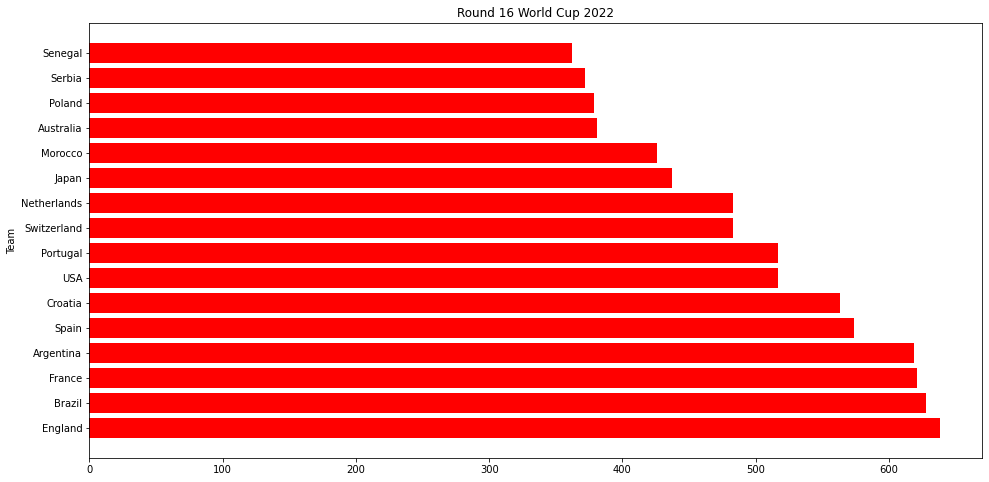

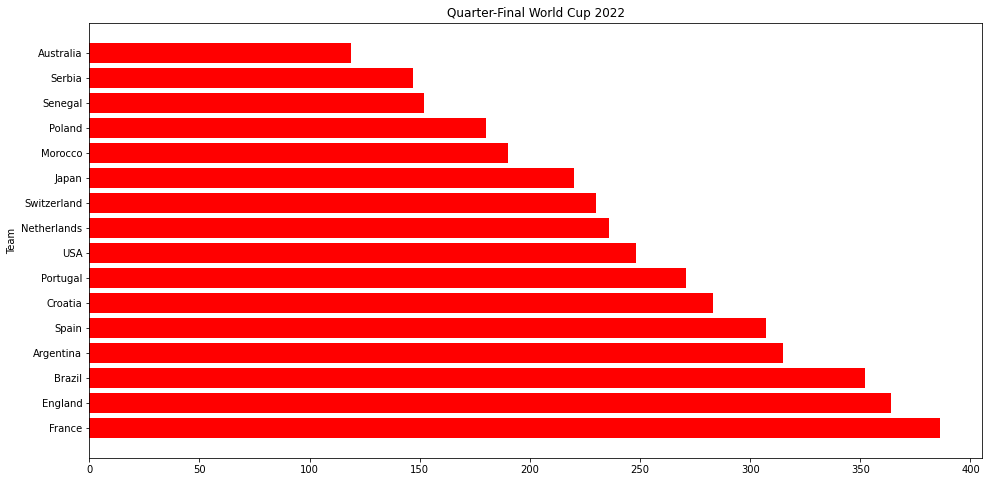

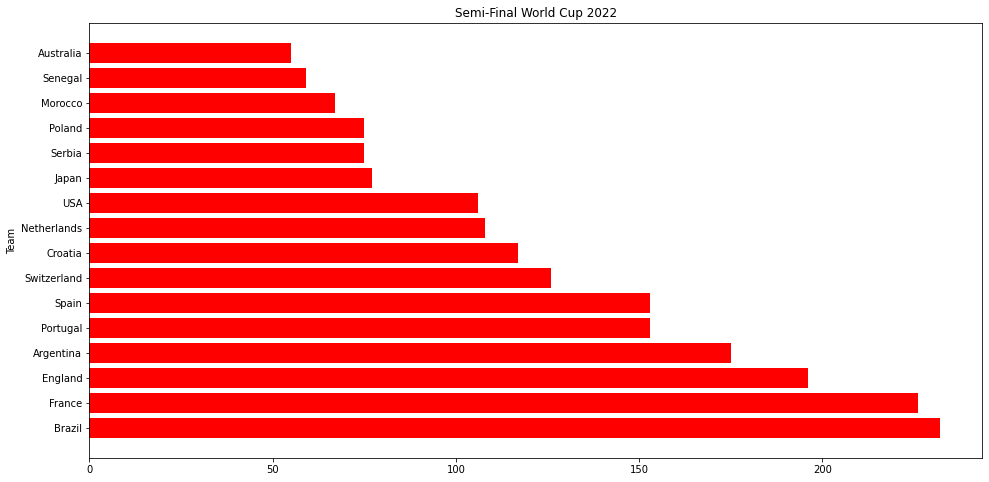

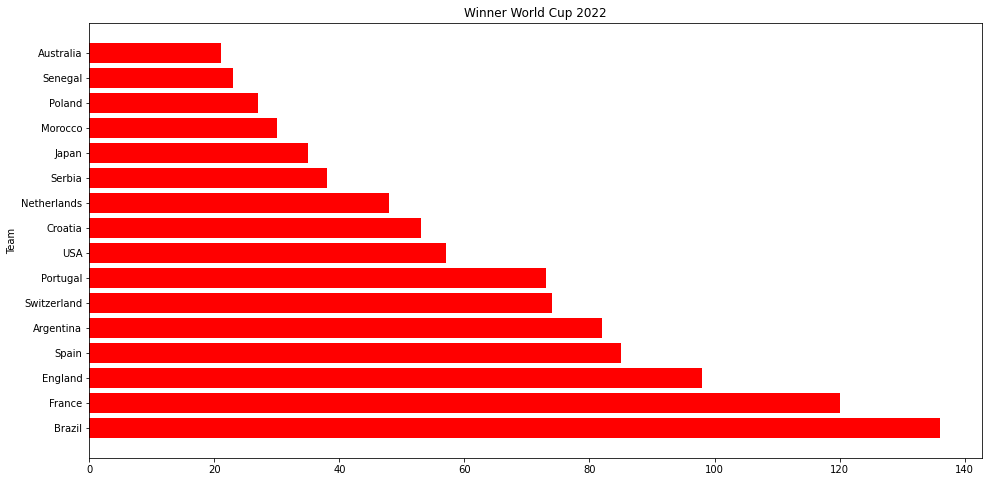

In [ ]:
from matplotlib import figure

lst_results = [simulation_results_round16,simulation_results_quarterfinal,simulation_results_semifinal,simulations_winners]
for i in lst_results:
    results = Counter(i).most_common()
    x,y = zip(*results)

    fig,ax = plt.subplots(figsize=(16,8))

    ax.barh(x, y, color = "r")

    ax.set_ylabel('Team')

    if i == simulation_results_round16:
        ax.set_title('Round 16 World Cup 2022')
    if i == simulation_results_quarterfinal:
        ax.set_title('Quarter-Final World Cup 2022')
    if i == simulation_results_semifinal:
        ax.set_title('Semi-Final World Cup 2022')
    if i == simulations_winners:
        ax.set_title('Winner World Cup 2022')


    plt.show()


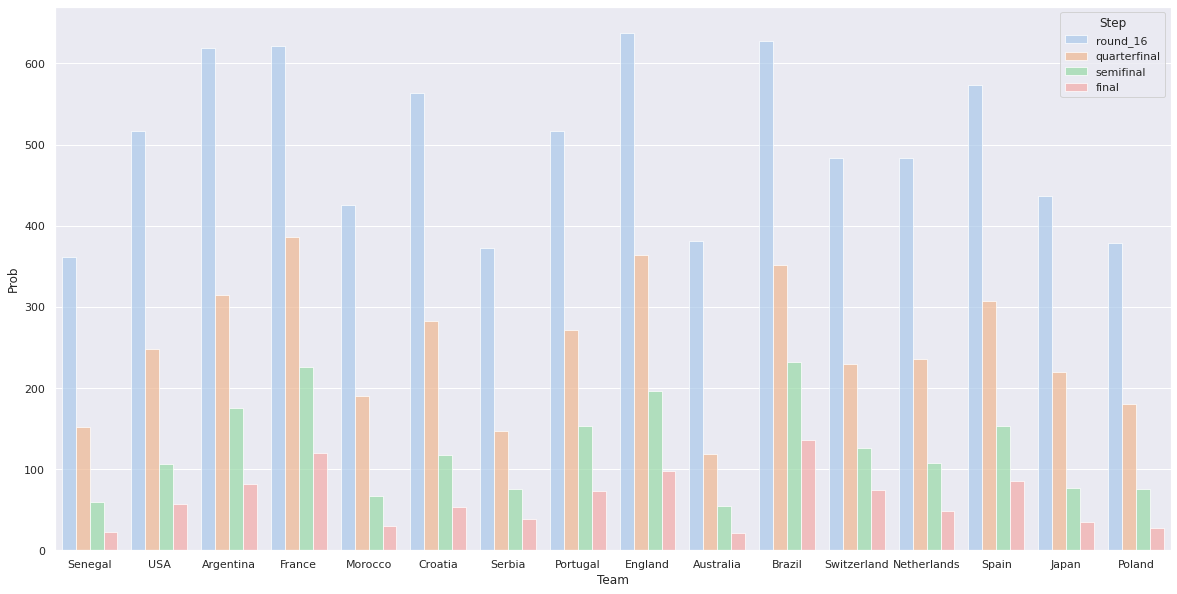

In [ ]:
#Join all data in onw single view
import seaborn as sns

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(20,10)})

# Draw a nested barplot by Team and Step
g = sns.barplot(data=df_results, x="Team",y='Prob', hue="Step", estimator=sum, palette="pastel", alpha=.7)